In [1]:
#imported libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'perrin-freres-monthly-champagne-.csv') #Imported Data
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [3]:
df.info() #Checking the Data type and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [4]:
round(df.describe(),2) #Checking statistical properties

,Perrin Freres monthly champagne sales millions ?64-?72
count,105.00
mean,4761.15
std,2553.50
min,1413.00
25%,3113.00
50%,4217.00
75%,5221.00
max,13916.00


In [5]:
df.dropna(inplace=True) #Dropping null values
df.isnull().sum() #Checking null values

Month                                                     0
Perrin Freres monthly champagne sales millions ?64-?72    0
dtype: int64

In [6]:
df['Month'] = pd.to_datetime(df['Month'],format='mixed') #Converting month Dtype into datetime format
df.info() #Checking info of the data

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Month                                                   105 non-null    datetime64[ns]
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


In [7]:
df.tail() #shows top 5 bottom rows

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0
104,1972-09-01,5877.0


In [8]:
df.shape #shows shape of the data

(105, 2)

In [9]:
df.columns = ['Month','Sale'] #Changes the aname of the columns
df

,Month,Sale
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


In [10]:
df.set_index('Month', inplace=True) #Set month columns into index

In [11]:
df.head() #Shows top 5 columns 

,Sale
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


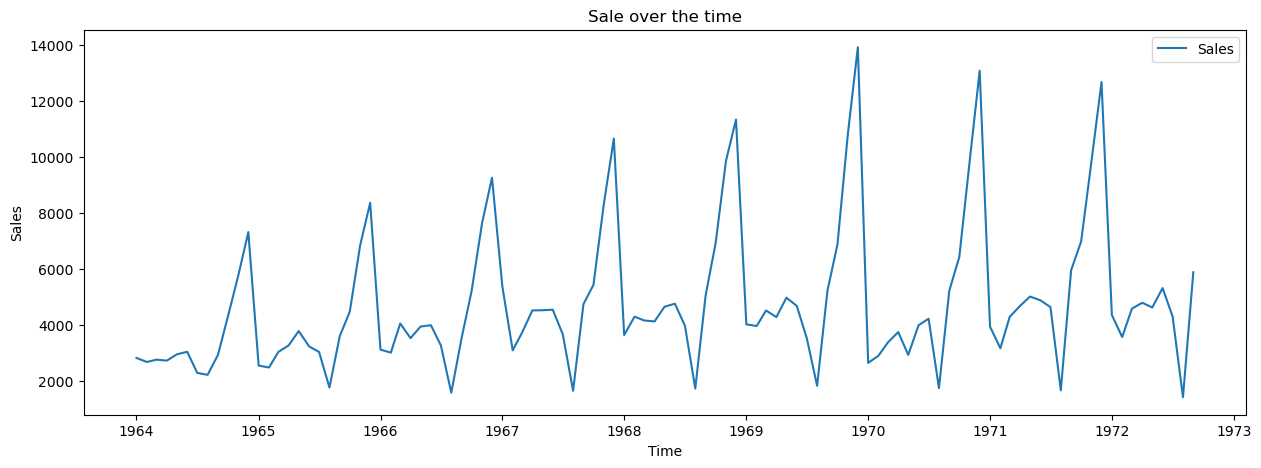

In [12]:
plt.figure(figsize=(15,5))
plt.title('Sale over the time')
plt.plot(df, label = 'Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

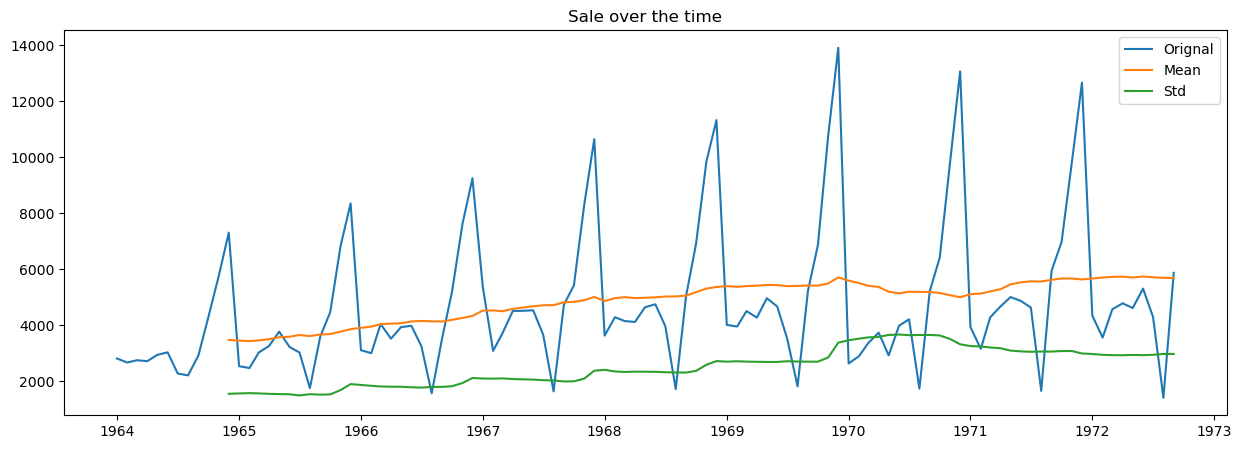

In [13]:
rollmean = df.rolling(window=12).mean()
rollstd = df.rolling(window=12).std()

plt.figure(figsize=(15,5))
plt.title('Sale over the time')
plt.plot(df, label = 'Orignal')
plt.plot(rollmean, label = 'Mean')
plt.plot(rollstd, label = 'Std')
plt.legend()
plt.show()

In [14]:
#checking stationarity
from statsmodels.tsa.stattools import adfuller

In [15]:
# H0: Data is not stationary
# H1: Data is stationary

def test_stationarity(x):
    adf_test = adfuller(x)
    print('ADF Test Results')
    print(f'Statistic Value: {adf_test[0]}')
    p_value = adf_test[1]
    print(f'P-Value: {p_value}')
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print(f'   {key}: {value}')
    
    if p_value < 0.05:
        print('✅ Series is stationary. Reject the null hypothesis (H0).')
    else:
        print('❌ Series is NOT stationary. accept the null hypothesis (H0).')


In [16]:
test_stationarity(df)

ADF Test Results
Statistic Value: -1.833593056327623
P-Value: 0.363915771660245
Critical Values:
   1%: -3.502704609582561
   5%: -2.8931578098779522
   10%: -2.583636712914788
❌ Series is NOT stationary. accept the null hypothesis (H0).


In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonl_additive = seasonal_decompose(df, period=12, model = 'addative')

In [18]:
trend = seasonl_additive.trend
seasonal = seasonl_additive.seasonal
residual = seasonl_additive.resid

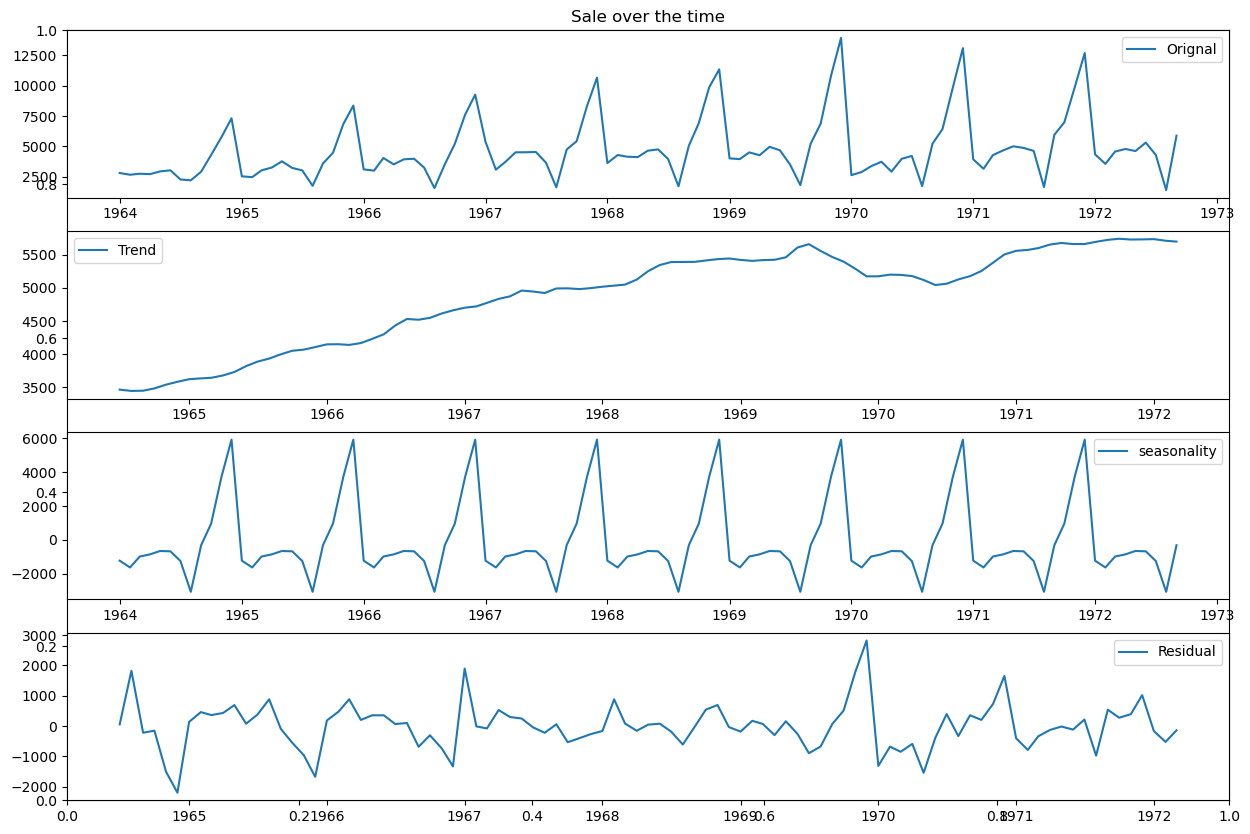

In [19]:
plt.figure(figsize=(15,10))
plt.title('Sale over the time')

plt.subplot(411)
plt.plot(df,label = 'Orignal')
plt.legend()

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend()

plt.subplot(413)
plt.plot(seasonal, label = 'seasonality')
plt.legend()

plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend()
plt.show()

# Making data stationarity

In [20]:
#Shifting by 1 and Differencing
df['firstDiff'] = df['Sale'] - df['Sale'].shift(1)
df

,Sale,firstDiff
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0
...,...,...
1972-05-01,4618.0,-170.0
1972-06-01,5312.0,694.0
1972-07-01,4298.0,-1014.0


In [21]:
#Shifting by 12 and Differencing
df['SeasonalSale'] = df['firstDiff'] - df['firstDiff'].shift(12)
df

,Sale,firstDiff,SeasonalSale
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
...,...,...,...
1972-05-01,4618.0,-170.0,-504.0
1972-06-01,5312.0,694.0,830.0
1972-07-01,4298.0,-1014.0,-773.0


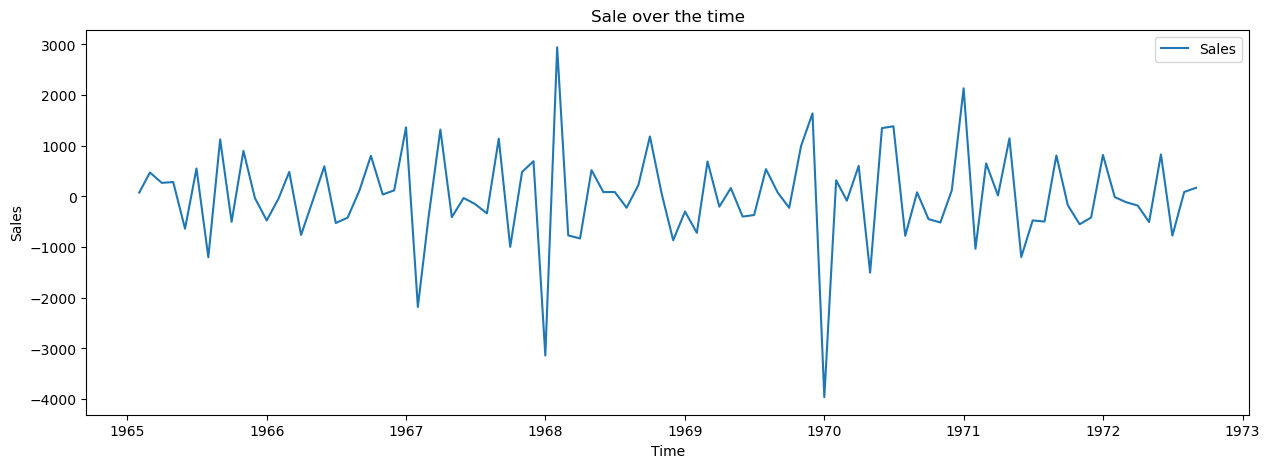

In [22]:
plt.figure(figsize=(15,5))
plt.title('Sale over the time')
plt.plot(df['SeasonalSale'], label = 'Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [23]:
test_stationarity(df['SeasonalSale'].dropna())

ADF Test Results
Statistic Value: -4.427713497307538
P-Value: 0.00026504628492931003
Critical Values:
   1%: -3.5148692050781247
   5%: -2.8984085156250003
   10%: -2.58643890625
✅ Series is stationary. Reject the null hypothesis (H0).


In [24]:
#impoting library for ACF and PACF plot

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df['SeasonalSale'].dropna(), nlags=20)
lag_pacf = pacf(df['SeasonalSale'].dropna(), nlags=20)

In [25]:
lag_acf

array([ 1.        , -0.42195114, -0.09430821,  0.07434433,  0.0043774 ,
       -0.08104485, -0.03665555,  0.04535312,  0.07818965, -0.09834564,
        0.0646181 ,  0.11215009, -0.37966041,  0.3588898 , -0.0527602 ,
       -0.07515121, -0.08502832,  0.06181156,  0.10858334, -0.09818183,
       -0.10793321])

In [26]:
lag_pacf

array([ 1.        , -0.42658796, -0.34030991, -0.17066773, -0.08834766,
       -0.15160867, -0.22471162, -0.19396218, -0.03684659, -0.11393605,
       -0.03676525,  0.16475062, -0.41289325,  0.09005412,  0.07105284,
        0.04751972, -0.19093674, -0.24796865,  0.01782106, -0.00986552,
       -0.24534446])

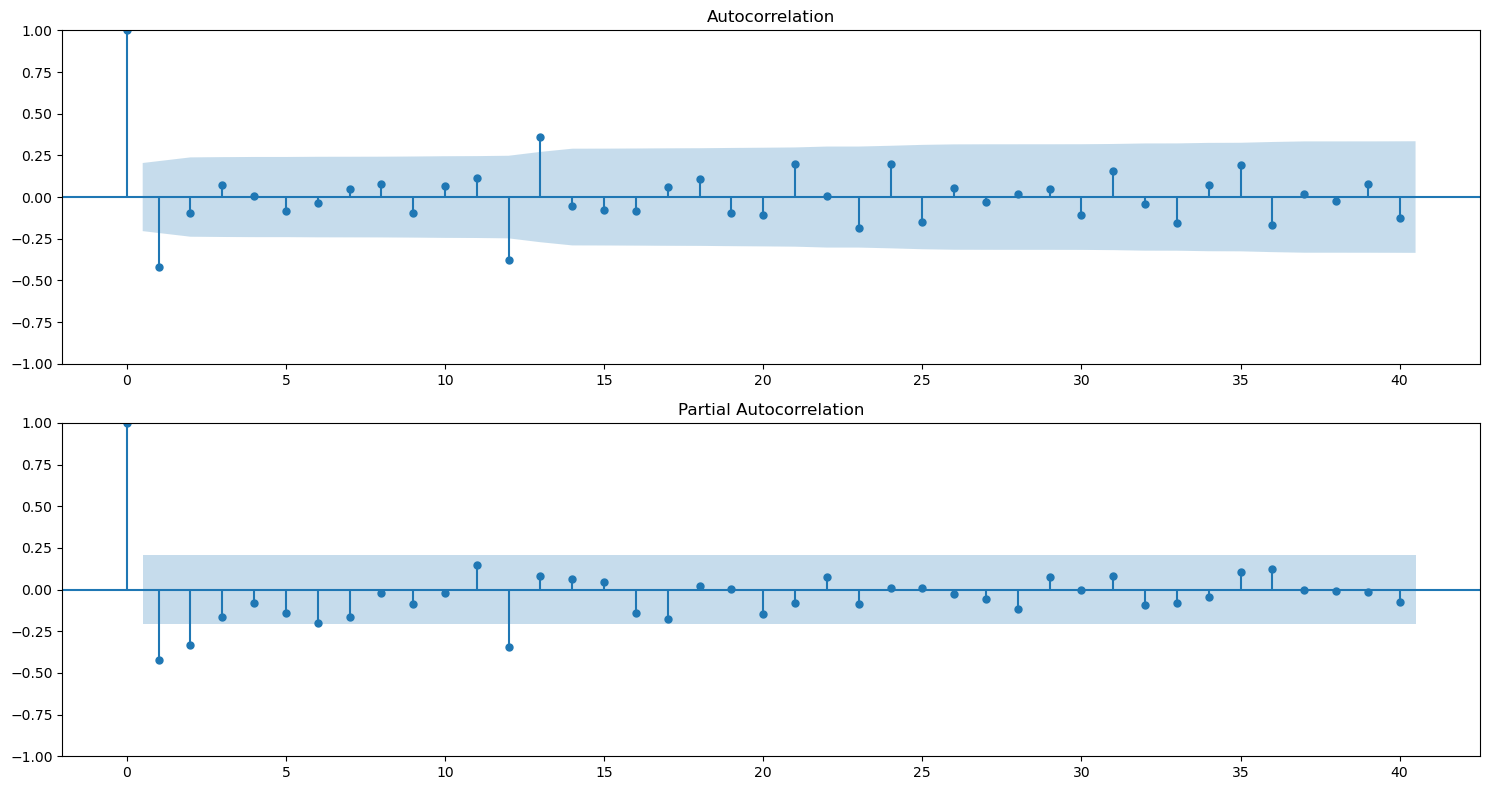

In [27]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.figure(figsize=(15, 8))

# ACF plot
plt.subplot(211)
sm.graphics.tsa.plot_acf(df['SeasonalSale'].dropna(), lags=40, ax=plt.gca())

# PACF plot
plt.subplot(212)
sm.graphics.tsa.plot_pacf(df['SeasonalSale'].dropna(), lags=40, ax=plt.gca())

plt.tight_layout()
plt.show()


# ARIMA Model

In [28]:
from statsmodels.tsa.arima.model import ARIMA

In [29]:
arima_model = ARIMA(df['Sale'], order = (1,1,1)) #p = 1, d = 1, q = 1 
model_fi = arima_model.fit()

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [30]:
model_fi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Sale   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Fri, 18 Jul 2025   AIC                           1911.627
Time:                        11:48:43   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
df['ArimaPred'] = model_fi.predict(start = 90, end = 105, dynamic = True)

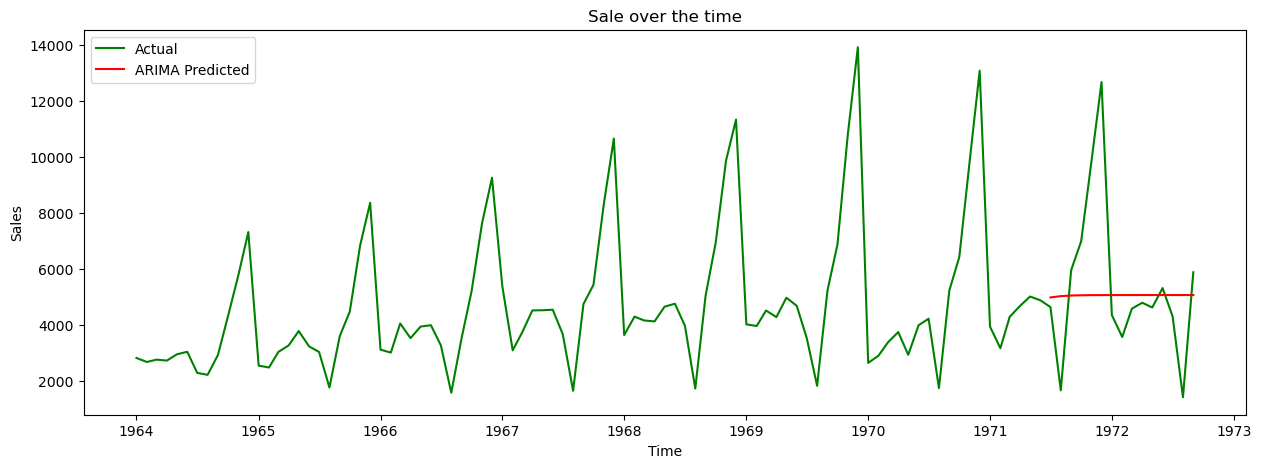

In [32]:
plt.figure(figsize=(15,5))
plt.title('Sale over the time')
plt.plot(df['Sale'], label = 'Actual', color = 'green')
plt.plot(df['ArimaPred'], label = 'ARIMA Predicted', color = 'red')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

### As the data is seasonal, So ARIMA model is not giving best prediction

# SARIMAX Model

In [33]:
import statsmodels.api as sm

In [34]:
model = sm.tsa.statespace.SARIMAX(df['Sale'], order=(1,2,1), seasonal_order=(1,1,1,12)) #p = 1, d = 1, q = 1  seasonal = (P,D,Q,s) 
result =  model.fit()

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
df['forcast'] = result.predict(start = 90, end = 105, dynamic = True)

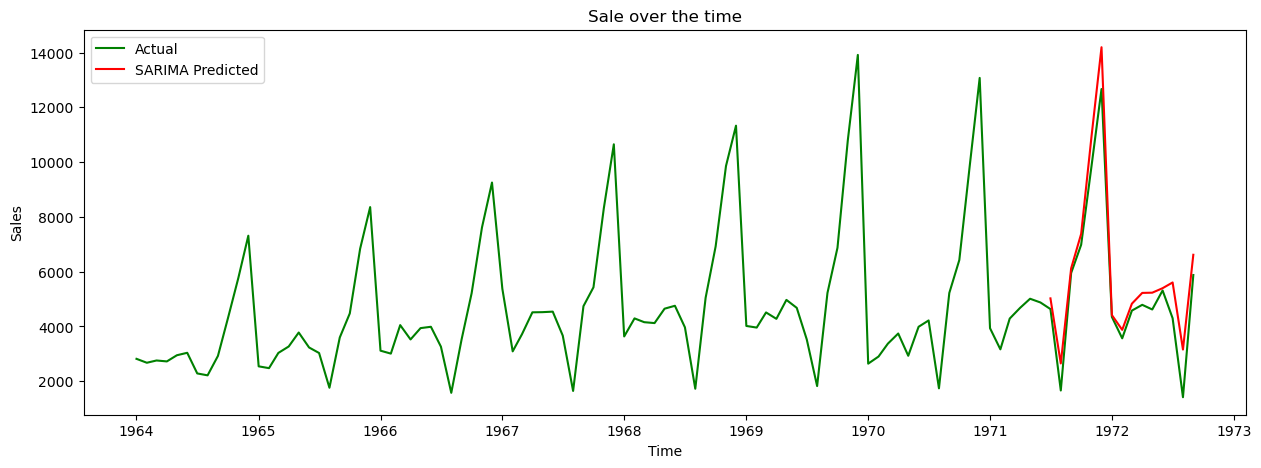

In [36]:
plt.figure(figsize=(15,5))
plt.title('Sale over the time')
plt.plot(df['Sale'], label = 'Actual', color = 'green')
plt.plot(df['forcast'], label = 'SARIMA Predicted', color = 'red')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [37]:
FuturPred = result.predict(start = 105, end = 120, dynamic = True)

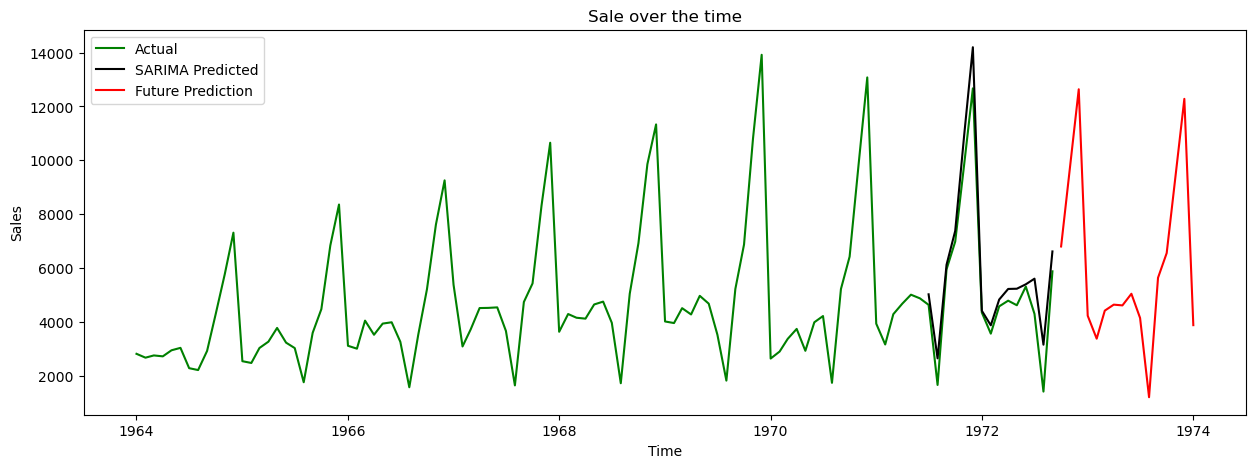

In [38]:
plt.figure(figsize=(15,5))
plt.title('Sale over the time')
plt.plot(df['Sale'], label = 'Actual', color = 'green')
plt.plot(df['forcast'], label = 'SARIMA Predicted', color = 'black')
plt.plot(FuturPred, label = 'Future Prediction', color = 'red')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()